<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

#### 9. Support Vector Machines

In [1]:
LoadLibraries = function() {
    library(MASS)
    install.packages("e1071")
    library(e1071)
    install.packages("ROCR")
    library(ROCR)
    install.packages("ISLR")
    library(ISLR)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies 'gtools', 'gdata', 'gplots'

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] "Libraries have been loaded!"


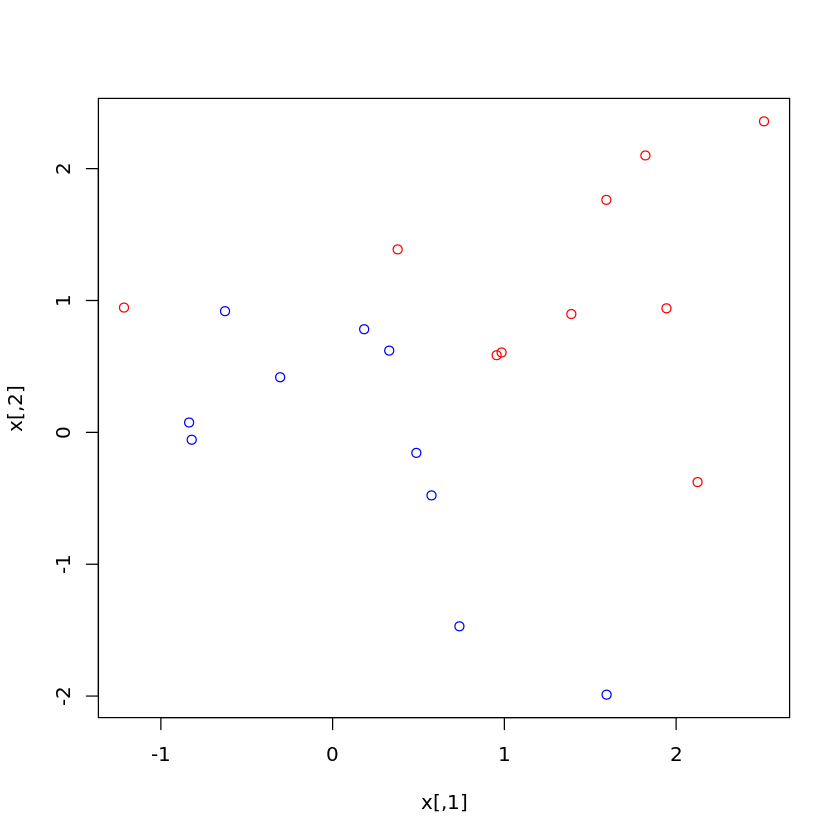

In [2]:
# generating observations with 2 classes
# that are linearly separable
set.seed(1)
x = matrix(rnorm(20*2), ncol=2)
y = c(rep(-1,10), rep(1,10))
x[y==1,] = x[y==1,] + 1
plot(x, col=(3-y))

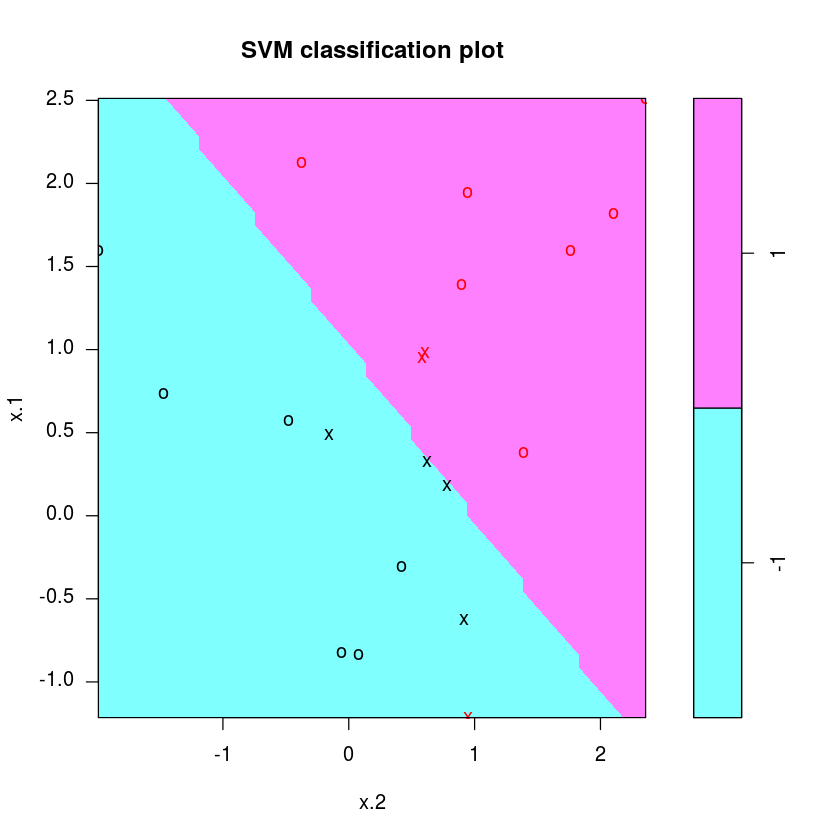

In [10]:
# fit support vector classifier
# encode variable as factor variable
data = data.frame(x=x, y=as.factor(y))

# cost is the cost of violation to the margin
# cost is small, then margin will be wider
# cost is large, then margin will be narrower
svmfit = svm(y~., data=data, kernel="linear", cost=10, scale=FALSE)
plot(svmfit, data)

In [11]:
# 7 support vectors
svmfit$index

[1]  1  2  5  7 14 16 17

In [12]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1





Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 0.1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




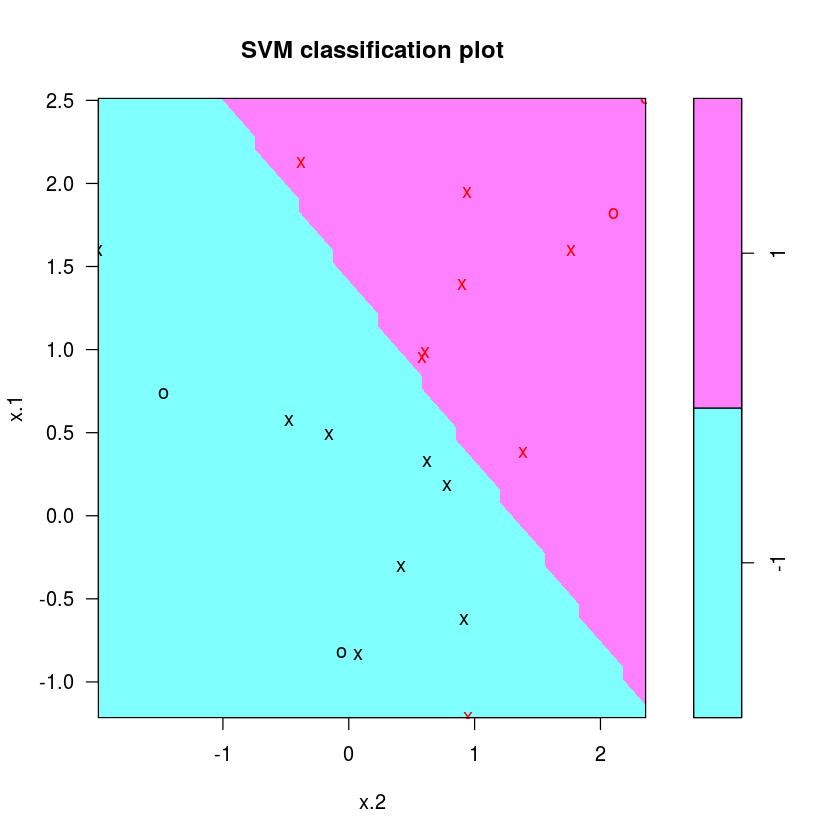

In [9]:
svmfit = svm(y~., data=data, kernel="linear", cost=0.1, scale=FALSE)
plot(svmfit, data)
summary(svmfit)

In [14]:
# tune to perform cross-validation
# by default, 10-fold cross-validation
set.seed(1)
tune.out = tune(svm, y~., data=data, kernel="linear", ranges=list(cost=c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)

# cost 0.1 outputs best model


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.70  0.4216370
2 1e-02  0.70  0.4216370
3 1e-01  0.10  0.2108185
4 1e+00  0.15  0.2415229
5 5e+00  0.15  0.2415229
6 1e+01  0.15  0.2415229
7 1e+02  0.15  0.2415229


In [15]:
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = data, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.5 

Number of Support Vectors:  16

 ( 8 8 )


Number of Classes:  2 

Levels: 
 -1 1




In [17]:
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,] = xtest[ytest==1,] + 1
testdata = data.frame(x=xtest, y=as.factor(ytest))

ypred = predict(bestmod, testdata)
table(predict=ypred, truth=testdata$y)

       truth
predict -1 1
     -1  8 3
     1   1 8

In [18]:
# with cost 0.01
svmfit = svm(y~., data=data, kernel="linear", cost=0.01, scale=FALSE)
ypred = predict(svmfit, testdata)
table(predict=ypred, truth=testdata$y)

       truth
predict -1 1
     -1  9 6
     1   0 5


Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




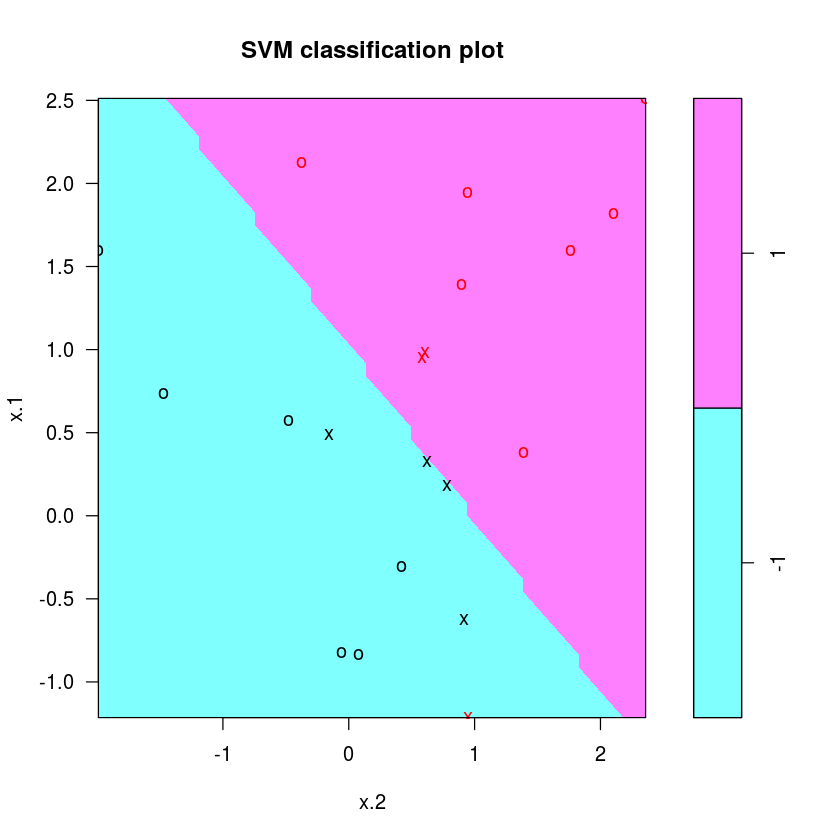

In [21]:
# make data just barely linearly separable
data = data.frame(x=x, y=as.factor(y))

# cost is small, then margin will be wider
# cost is large, then margin will be narrower
svmfit = svm(y~., data=data, kernel="linear", cost=1e5)

summary(svmfit)
plot(svmfit, data)


Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  11

 ( 6 5 )


Number of Classes:  2 

Levels: 
 -1 1




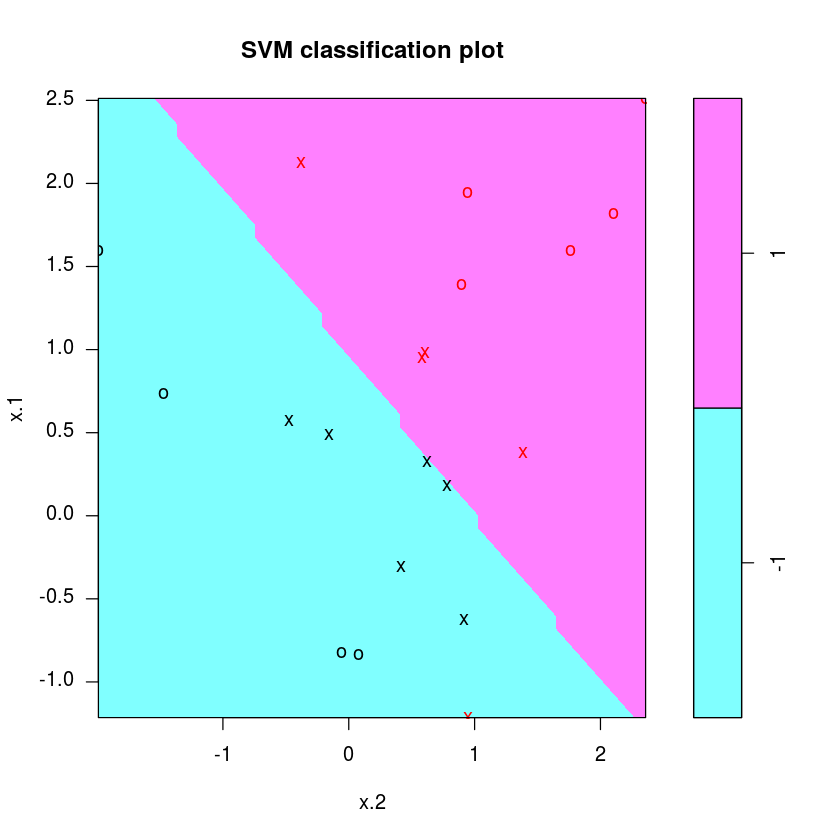

In [22]:
svmfit = svm(y~., data=data, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit, data)

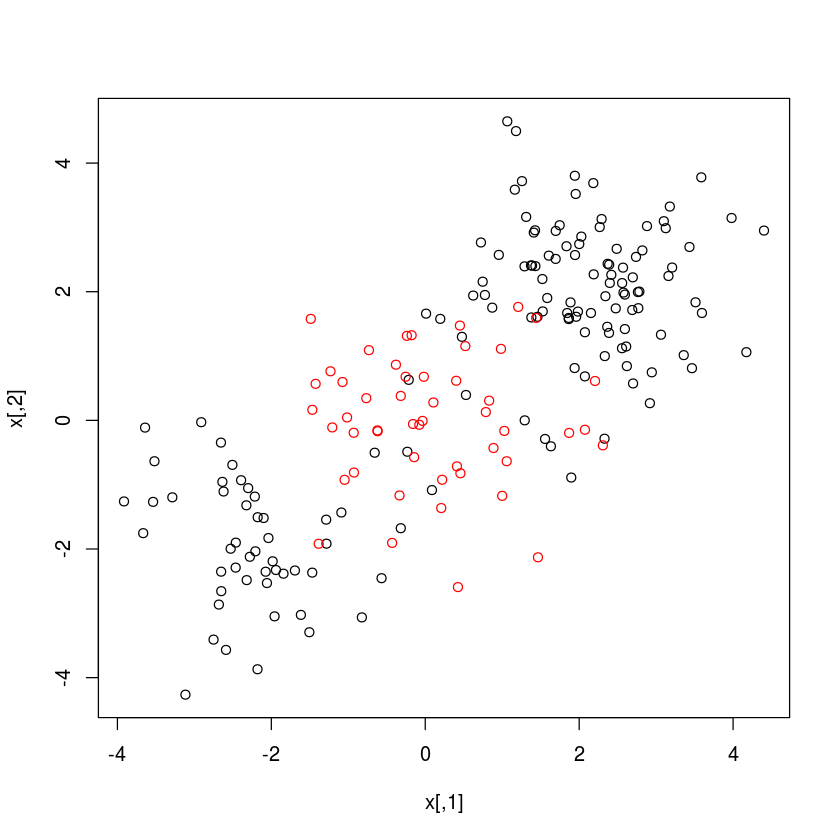

In [23]:
# support vector machine with non-linear kernel
set.seed(1)
x = matrix(rnorm(200*2), ncol=2)
x[1:100,] = x[1:100,] + 2
x[101:150,] = x[101:150,] - 2
y = c(rep(1,150),rep(2,50))
data = data.frame(x=x, y=as.factor(y))
plot(x, col=y)

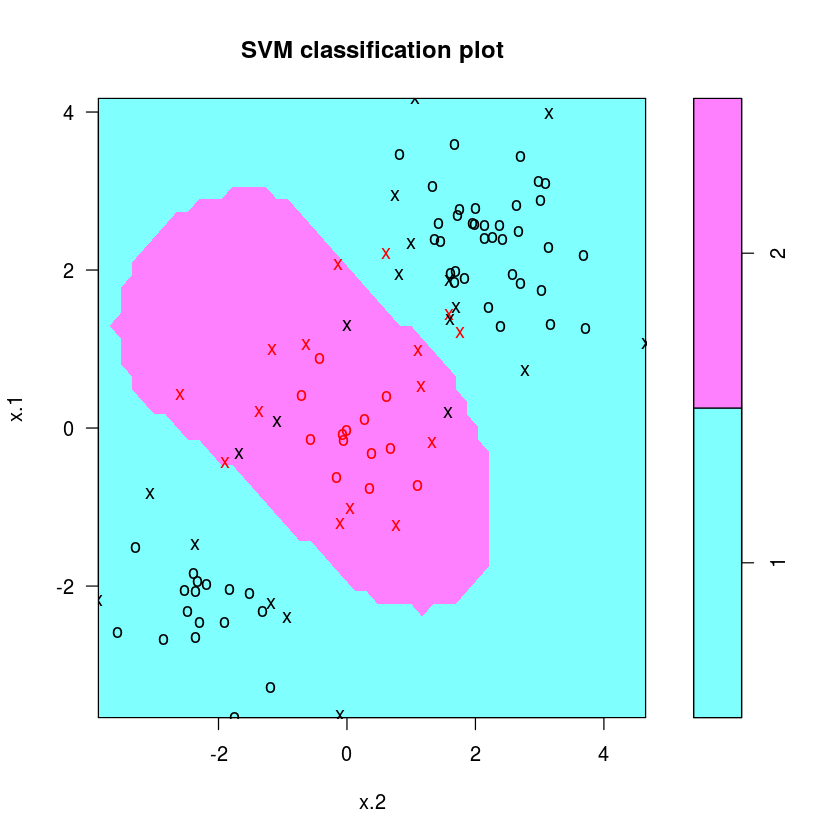

In [25]:
train = sample(200,100)
svmfit = svm(y~., data=data[train,], kernel="radial", gamma=1, cost=1)
plot(svmfit, data[train,])

In [26]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = data[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  35

 ( 15 20 )


Number of Classes:  2 

Levels: 
 1 2




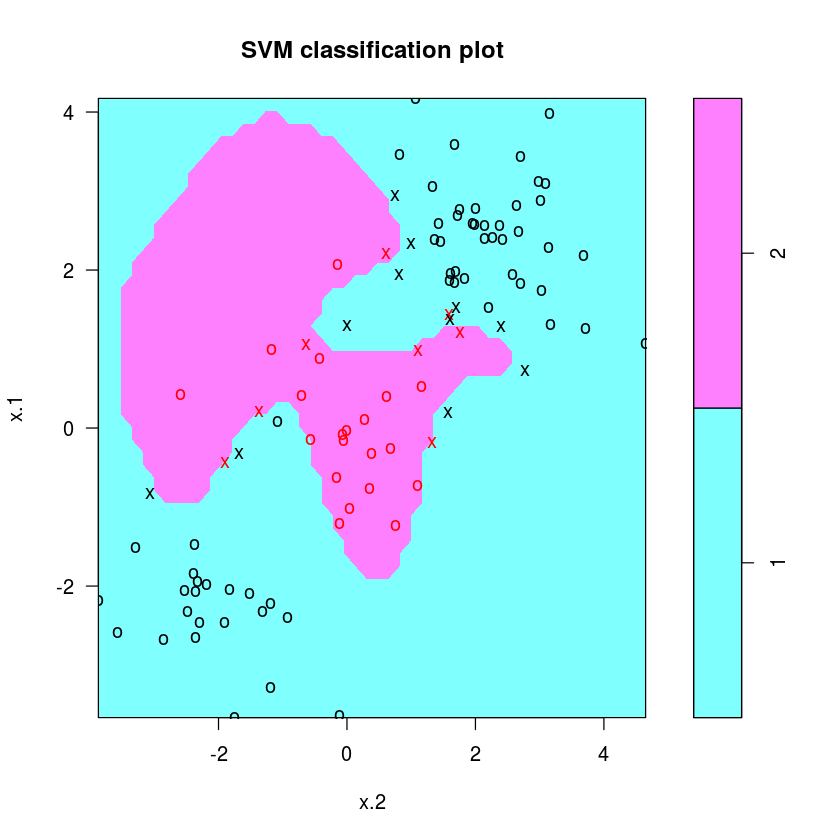

In [27]:
# higher cost, narrower margin, but overfit (irregular decision boundary)
svmfit = svm(y~., data=data[train,], kernel="radial", gamma=1, cost=1e5)
plot(svmfit, data[train,])

In [32]:
set.seed(1)
tune.out = tune(svm,
                y~.,
                data=data[train,],
                kernel="radial",
                ranges=list(cost=c(0.1, 1, 10, 100, 1000), gamma=c(0.5, 1, 2, 3, 4)),
               )

summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.09 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.20 0.14142136
2  1e+00   0.5  0.09 0.08755950
3  1e+01   0.5  0.10 0.08164966
4  1e+02   0.5  0.11 0.09944289
5  1e+03   0.5  0.14 0.13498971
6  1e-01   1.0  0.11 0.09944289
7  1e+00   1.0  0.10 0.08164966
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.14 0.12649111
10 1e+03   1.0  0.14 0.12649111
11 1e-01   2.0  0.18 0.12292726
12 1e+00   2.0  0.10 0.08164966
13 1e+01   2.0  0.12 0.09189366
14 1e+02   2.0  0.19 0.12866839
15 1e+03   2.0  0.18 0.13165612
16 1e-01   3.0  0.22 0.13165612
17 1e+00   3.0  0.10 0.08164966
18 1e+01   3.0  0.16 0.09660918
19 1e+02   3.0  0.15 0.11785113
20 1e+03   3.0  0.18 0.13165612
21 1e-01   4.0  0.26 0.11737878
22 1e+00   4.0  0.10 0.08164966
23 1e+01   4.0  0.16 0.11737878
24 1e+02   4.0  0.16 0.11737878
25 1e+03   4.0  0.19 0

In [34]:
table(true=data[-train, "y"],
      pred=predict(tune.out$best.model, newdata=data[-train,]))

    pred
true  1  2
   1 68 10
   2  1 21

In [43]:
# ROC Curves
rocplot = function(pred, truth, ...) {
    predob = prediction(pred, truth)
    perf = performance(predob, "tpr", "fpr")
    plot(perf, ...)
}

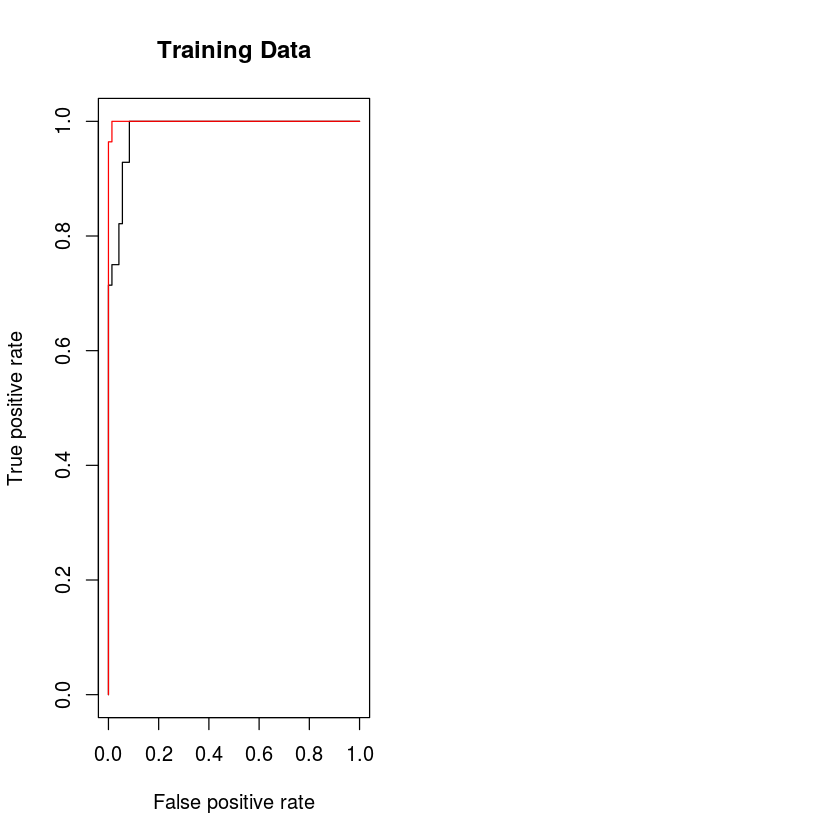

In [46]:
# sign of fitted value determines on which side of
# decision boundary the observation lies
svmfit.opt = svm(y~.,
                data=data[train,],
                kernel="radial",
                gamma=2,
                cost=1,
                decision.values=T)

fitted.opt = attributes(predict(svmfit.opt, data[train,], decision.values=TRUE))$decision.values

# increasing gamma for more flexible fit
svmfit.flex = svm(y~.,
                data=data[train,],
                kernel="radial",
                gamma=50,
                cost=1,
                decision.values=T)

fitted.flex = attributes(predict(svmfit.flex, data[train,], decision.values=TRUE))$decision.values

par(mfrow=c(1,2))
rocplot(fitted.opt, data[train, "y"], main="Training Data")
rocplot(fitted.flex, data[train, "y"], add=T, col="red")

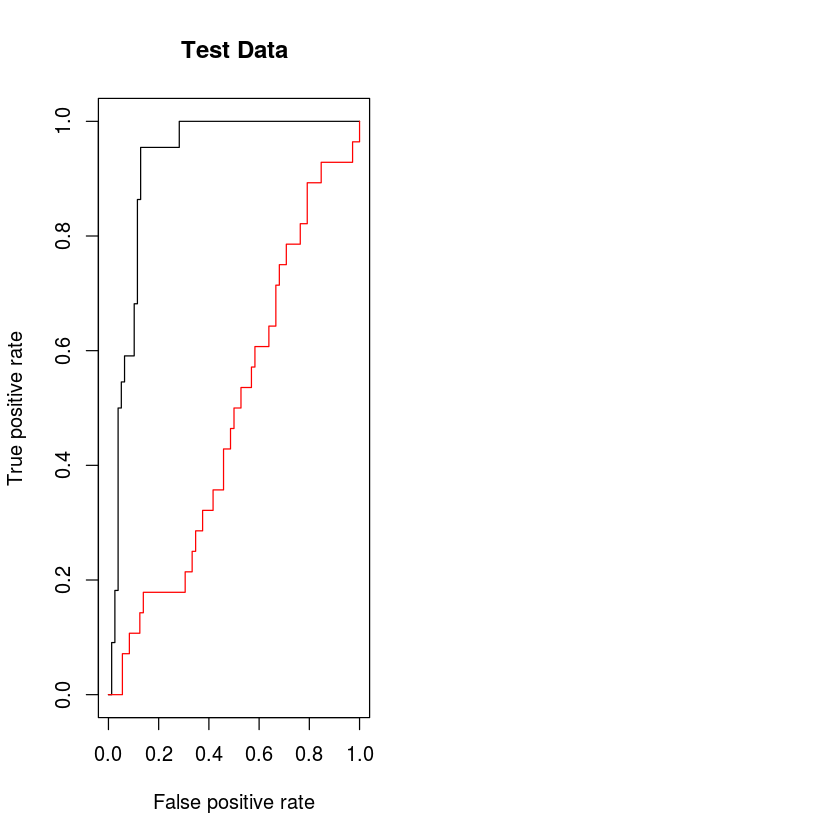

In [48]:
par(mfrow=c(1,2))

# gamma=2 better
fitted = attributes(predict(svmfit.opt, data[-train,], decision.values=T))$decision.values
rocplot(fitted, data[-train, "y"], main="Test Data")
fitted = attributes(predict(svmfit.flex, data[-train,], decision.values=T))$decision.values
rocplot(fitted, data[train, "y"], add=T, col="red")

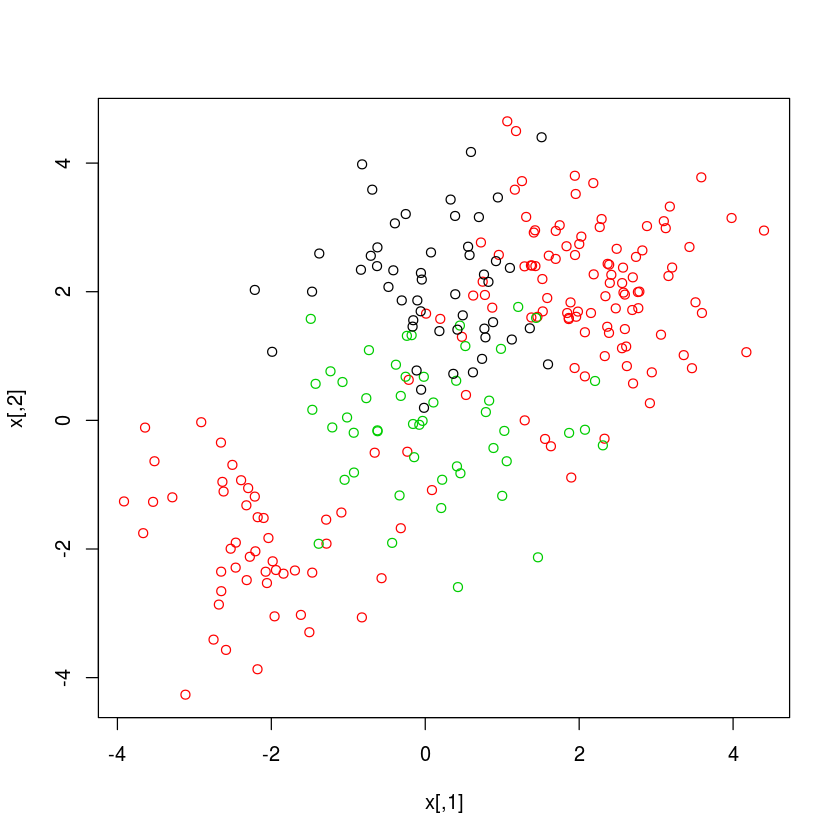

In [49]:
# SVM with multiple classes
set.seed(1)
x = rbind(x, matrix(rnorm(50*2), ncol=2))
y = c(y, rep(0,50))
x[y==0,2] = x[y==0,2] + 2
data = data.frame(x=x, y=as.factor(y))

par(mfrow=c(1,1))
plot(x, col=(y+1))

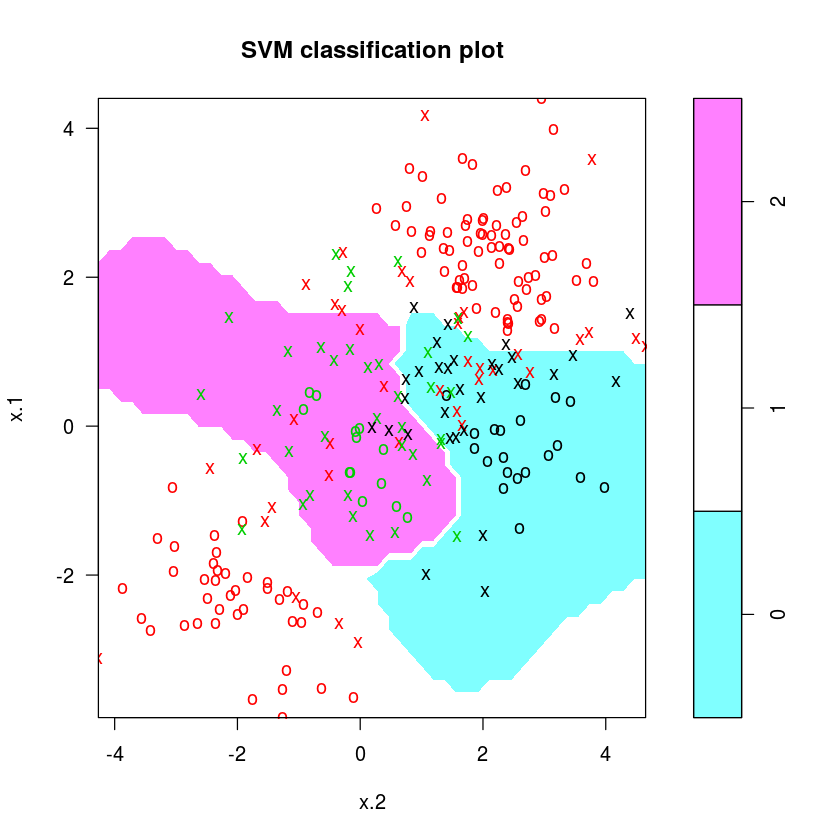

In [50]:
svmfit = svm(y~., data=data, kernel="radial", cost=10, gamma=1)
plot(svmfit, data)

In [53]:
names(Khan)

dim(Khan$xtrain)
dim(Khan$xtest)

length(Khan$ytrain)
length(Khan$ytest)

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20

In [54]:
table(Khan$ytrain)
table(Khan$ytest)


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [55]:
# use SVM to predict cancer subtype
data = data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out = svm(y~., data=data, kernel="linear", cost=10)
summary(out)


Call:
svm(formula = y ~ ., data = data, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




In [57]:
# no training error
table(out$fitted, data$y)

   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [58]:
# test data
data.test = data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.test = predict(out, newdata=data.test)
table(pred.test, data.test$y)

         
pred.test 1 2 3 4
        1 3 0 0 0
        2 0 6 2 0
        3 0 0 4 0
        4 0 0 0 5